# Lesson 2

## Intro

Hello, everyone! Here is the material for the second lesson.

## Part 1. Preparation.

First, let's import all the libraries we need. The control question to ask yourself is, "Do I understand what and which libraries are responsible for?"

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

As usual, read the data. The commands corresponding to the work with the table in this outline I will not describe in such detail, as in the previous one. Again, as you read this outline, you need to ask yourself questions like, "Do I understand what's being done in each instance?"

In [2]:
df = pd.read_excel("../Data-EN/Clouds.xls")

In [3]:
df.head()

,Al and Si in NaOH; La and Ce in feldspar,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Al,Si,La,Ce
1,2.05,3.49,9,36.6
2,1.91,3.38,5.2,17.5
3,1.98,3.33,10.2,25.2
4,1.87,3.24,8,23.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Al and Si in NaOH; La and Ce in feldspar  51 non-null     object
 1   Unnamed: 1                                51 non-null     object
 2   Unnamed: 2                                51 non-null     object
 3   Unnamed: 3                                51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [5]:
pd.set_option('display.max_rows', 100)

In [6]:
display(df)

,Al and Si in NaOH; La and Ce in feldspar,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Al,Si,La,Ce
1,2.05,3.49,9,36.6
2,1.91,3.38,5.2,17.5
3,1.98,3.33,10.2,25.2
4,1.87,3.24,8,23.4
5,1.91,3.3,5.1,15.4
6,1.79,3.03,5.1,12.5
7,2.03,3.42,4.8,25.3
8,1.87,3.15,7.9,16.9
9,1.98,3.43,9.2,25


In [7]:
dfControl = df.iloc[0:51, 0:4]
newHeader = dfControl.iloc[0]
dfControl = dfControl[1:]
dfControl.columns = newHeader

In [8]:
dfControl.tail()

,Al,Si,La,Ce
46,2.07,3.47,3.8,18.5
47,1.98,3.46,5.7,14.6
48,1.93,3.34,2.4,8.6
49,1.88,3.28,10.5,29.5
50,2.12,3.7,7.5,20.3


In [9]:
dfControl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Al      50 non-null     object
 1   Si      50 non-null     object
 2   La      50 non-null     object
 3   Ce      50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


Let's replace the data format in the columns, but let's do it not separately for each column, but as a loop to the list of columns of the frame `dfControl`.

In [10]:
for item in dfControl.columns:
    dfControl[item] = dfControl[item].astype('float64')

Let's look at the descriptive statistics. 

In [11]:
dfControl.describe()

,Al,Si,La,Ce
count,50.000000,50.000000,50.000000,50.000000
mean,1.976800,3.396800,6.512000,18.632000
std,0.116802,0.195442,2.951142,6.352902
min,1.680000,2.980000,2.100000,7.700000
25%,1.892500,3.252500,4.325000,14.150000
50%,1.980000,3.385000,5.900000,17.700000
75%,2.057500,3.527500,7.975000,22.900000
max,2.260000,3.880000,16.400000,36.900000


Let's move on to checking the correlations.

## Part 2. Correlations.

As you all know, the correlation (not to be confused with *covariance*) of two or more statistical attributes is a "measure" of their statistical dependence. At the same time, a causal relationship is not identical to the presence of a statistical relationship. Also, let me remind you that in the probability course we looked at examples of dependent but uncorrelated random variables -- make sure you understand what we're talking about.

Often in more real-world and applied problems, there are a lot of attributes to analyze, and you need to select a few key attributes from them, the ones that you are going to use for some kind of analysis. 

It requires a lot of skill and experience, which we don't have at the moment, of course, but sometimes it's enough to throw out pairs of well correlated attributes. 

So how do we know if there is a correlation between traits? Let's check this on the example of the two columns `Al` and `Si` from our dataframe.

Let's assemble the pairs of traits to be studied into a list.

In [12]:
sampleColumns = ['Al', 'Si']

Let's build scatterplots (`scatterplot`) for the given columns.

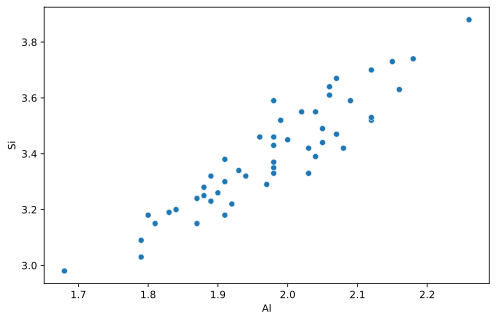

In [13]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumns], x = 'Al', y = 'Si')

What do we see in this graph? That the data is grouped in a "cloud. This stacking of dots means that there is correlation in the data. 

For comparison, let's construct a scatter diagram for the other two columns. What do we see?

In [14]:
sampleColumnsAnother = ['Al', 'Ce']

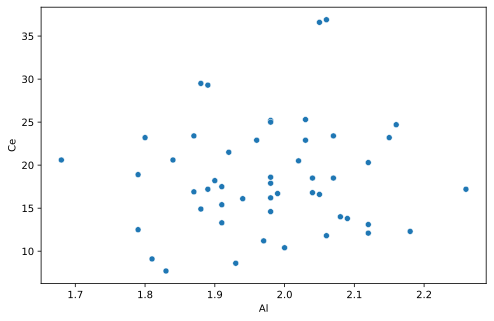

In [15]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumnsAnother], x = 'Al', y = 'Ce')

We see that the points are scattered all over the plane, which leads us to believe that there is no correlation between `Al` and `Ce`.

Of course, there may be situations where it is not very clear whether there is a correlation, in which case a trend line can help you. Let's try to construct a trend line for the scatterplot `Al` and `Si`.

In [16]:
# Let's set separate variables for specific columns
Al = dfControl['Al']
Si = dfControl['Si']

Now we need to build a trend line -- this can be done with the function `np.polyfit(x, y, deg)`, where as `x` and `y` you need to add the data for which you want to build a polynomial, and as `deg` you need to specify the degree of that polynomial. In our case, you need to specify one -- a straight line.

In [17]:
np.polyfit(Al, Si, 1)

array([1.5443628 , 0.34390362])

As you can see, the result of the command is returned as an array. In doing so, you understand what's inside -- the coefficients of the straight line. Of course, we could just copy the values from the array, but let's do it more elegantly.

In [18]:
z = np.polyfit(Al, Si, 1)
polynom = np.poly1d(z)
print(polynom)

 
1.544 x + 0.3439


Great! We got the equations of a straight line. Now let's put everything together in one picture. 

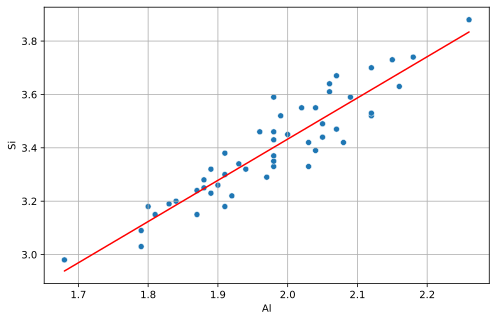

In [19]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumns], x = 'Al', y = 'Si')


# We need to set the points as arguments to `plt.plot()` and values of oue line
plt.plot(Al, polynom(Al), color = 'red')

# Add grid
plt.grid()

We built a point scatter diagram and a trend line, which convinces us of the presence of correlation between the studied pair of attributes. 

Let's do the same thing again for the pair `Al` and `Ce`.

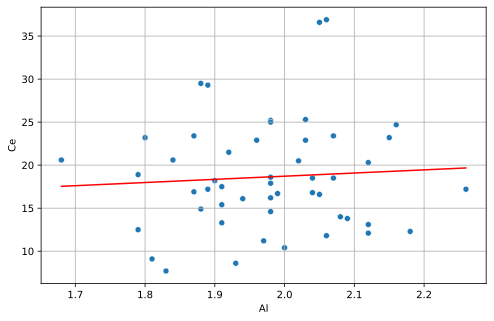

In [20]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumnsAnother], x = 'Al', y = 'Ce')
Ce = dfControl['Ce']
z = np.polyfit(Al, Ce, 1)
p = np.poly1d(z)
plt.plot(Al, p(Al), color = 'red')
plt.grid()

All the data are scattered far away from the trend line. Once again we are convinced that there is no correlation. 

### Task 1.

a) Implement a function that returns a straight line equation for a pair of columns. 

b) Implement the correct processing (how would such a function behave if the number of features in one and the other columns does not coincide?)

## Part 3. If You Can't Believe Your Eyes. 

As you can see, the presence or absence of correlation is well checked "by eye. But of course, there are more rigorous metrics. Let's calculate the correlation coefficient between the aforementioned traits.

You can use the method `np.corrcoef(Al, Si)` to do this.

In [21]:
np.corrcoef(Al, Si)

array([[1.        , 0.92295263],
       [0.92295263, 1.        ]])

What do we get in the output? Some array (matrix) where the `ij` place is a correlation. Why are there two ones? Because the correlation of a trait with itself is one. Why is the matrix symmetric? Because the correlation coefficient is a symmetric function. 

Thus, our calculated correlation coefficient is very close to one, which once again (following the method of looking closely) confirms the presence of correlation between the signs.

Let's calculate the correlation for another pair of traits that we suspect to be absent.

In [22]:
np.corrcoef(Al, Ce)

array([[1.        , 0.06763363],
       [0.06763363, 1.        ]])

That's the proof I needed.

But how can we be sure that the calculated coefficient can be trusted? To do this, we will calculate the P-value. The method `scipy.stats.pearsonr()` returns both the correlation coefficient and the P-value. 

In [23]:
import scipy.stats
print(scipy.stats.pearsonr(Al, Si))

PearsonRResult(statistic=0.9229526307710776, pvalue=1.5481515853220854e-21)


*We will talk about the meaning of the P-value separately at the seminar.

Another way to calculate the correlation of one trait relative to another that may be useful

In [24]:
print(Al.corr(Si))
print(Al.corr(Si), Al.corr(Ce))

0.9229526307710769
0.9229526307710769 0.06763363371120766


## Part 3. It's Time to Forget Everything Above.

If you like to shoot the sparrow with a cannon, then even in such simple tasks as ours, you can use the following commands

<AxesSubplot:xlabel='0', ylabel='0'>

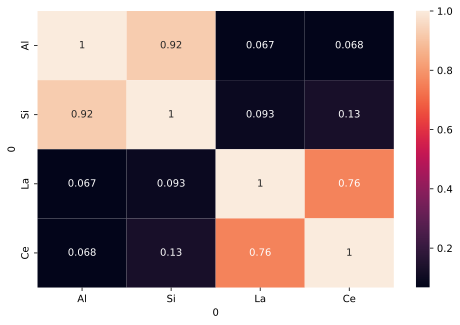

In [25]:
corrMatrix = dfControl.corr()
sns.heatmap(corrMatrix, annot = True)

We have just calculated a correlation matrix for all the traits, and then constructed a "heat map. The higher the correlation, the "warmer" the cell, the lower, the "cooler.

Also don't forget `sns.pairplot()`, which builds everything we need.

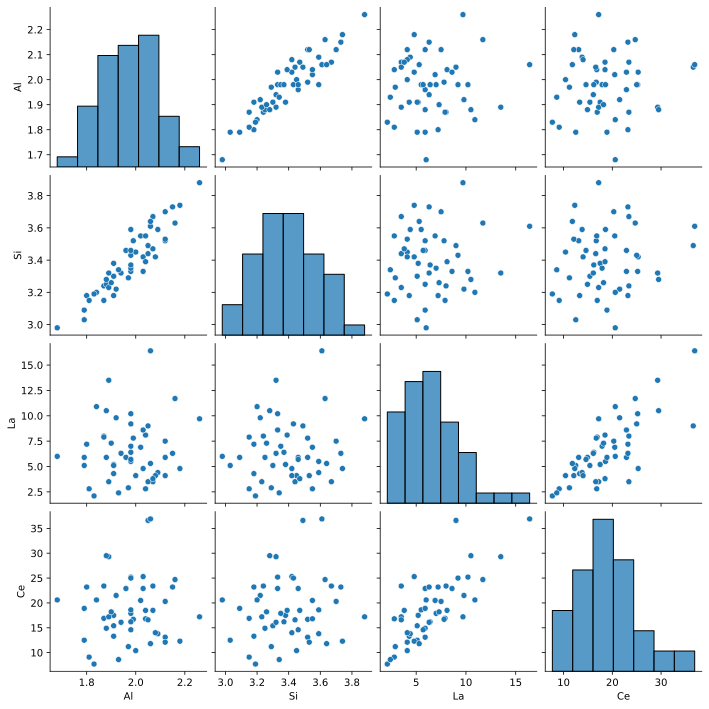

In [26]:
sns.pairplot(dfControl)

Thus, the general plan for checking for correlation is as follows.

## Part 4. Checking Plan.

* Build a picture of the points
* Construct a trend line
* Calculate the correlation (Pearson's)
* Calculate the P-value
* If the picture is coarse, the trend line fits in the cloud, R is close to 1 (or -1), P-value is small => correlated => the hypothesis of independence of the signs is rejected (i.e. the signs are dependent)

### Task 2

Complete your individual assignment.